## Genre Data Analysis:
* data pivoting
* column added - number of meaningful genres

### import libraries

In [58]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

### data pivoting

#### 1. get a dataframe of top 500 games with their corresponding genres

API source: Steam API

In [3]:
def get_genre(app_id):
    url = 'https://store.steampowered.com/api/appdetails'
    parameters = {'appids': app_id, 'filters': 'genres'}
    response = requests.get(url, params=parameters)
    response = json.loads(response.text)
    if response != None and response[str(app_id)]['success'] == True and isinstance(response[str(app_id)]['data'], dict) == True:
        genre_dict = response[str(app_id)]['data']['genres']
        genre_list = [genre['description'] for genre in genre_dict]
        return genre_list

In [4]:
df_all_games = pd.read_csv('df_all_games.csv')
df_100_games = df_all_games.head(100)
df_100_games['genre'] = df_100_games['appid'].apply(get_genre)
df_100_games

/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_51772/725549456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100_games['genre'] = df_100_games['appid'].apply(get_genre)


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre
0,570,Dota 2,Valve,Valve,NaN,1611153,338953,0,"200,000,000 .. 500,000,000",37228,1393,853,711,0,0,0,532699,"[Action, Free to Play, Strategy]"
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,6207621,811918,0,"50,000,000 .. 100,000,000",30347,822,5979,331,0,0,0,1010721,"[Action, Free to Play]"
2,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,NaN,513660,105734,0,"50,000,000 .. 100,000,000",8491,917,834,498,0,0,0,363786,"[Action, Adventure, Free to Play]"
3,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,1231039,925364,0,"50,000,000 .. 100,000,000",22551,734,5940,230,0,0,0,328139,"[Action, Adventure, Free to Play, Massively Mu..."
4,1063730,New World,Amazon Games,Amazon Games,NaN,176376,75957,0,"50,000,000 .. 100,000,000",9175,723,3226,454,1999,3999,50,17498,"[Action, Adventure, Massively Multiplayer, RPG]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594570,Total War: WARHAMMER II,"CREATIVE ASSEMBLY, Feral Interactive (Mac), Fe...","SEGA, Feral Interactive (Mac), Feral Interacti...",NaN,110847,8407,0,"5,000,000 .. 10,000,000",15646,248,3541,393,2039,5999,66,4817,"[Action, Strategy]"
96,319630,Life is Strange - Episode 1,"DONTNOD Entertainment, Feral Interactive (Mac)...","Square Enix, Feral interactive (Mac), Feral In...",NaN,153221,6152,0,"5,000,000 .. 10,000,000",519,18,163,18,0,0,0,215,"[Action, Adventure]"
97,12120,Grand Theft Auto: San Andreas,Rockstar Games,Rockstar Games,NaN,72152,6472,0,"5,000,000 .. 10,000,000",1346,215,261,254,0,0,0,602,[Action]
98,109600,Neverwinter,Cryptic Studios,Gearbox Publishing,NaN,27628,8014,0,"5,000,000 .. 10,000,000",1864,102,307,157,0,0,0,1137,"[Action, Adventure, Free to Play, Massively Mu..."


In [5]:
df_200_games = df_all_games.iloc[99:199]
df_200_games['genre'] = df_200_games['appid'].apply(get_genre)
df_200_games

/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_51772/1750976274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200_games['genre'] = df_200_games['appid'].apply(get_genre)


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre
99,311210,Call of Duty: Black Ops III,"Treyarch, Aspyr (Mac)","Activision, Aspyr (Mac)",NaN,131726,29123,0,"5,000,000 .. 10,000,000",3170,449,1382,199,1979,5999,67,10295,"[Action, Adventure]"
100,883710,Resident Evil 2,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",NaN,121670,3574,0,"5,000,000 .. 10,000,000",1105,213,783,124,999,3999,75,3989,[Action]
101,1145360,Hades,Supergiant Games,Supergiant Games,NaN,218299,3239,0,"5,000,000 .. 10,000,000",2067,382,1099,417,1249,2499,50,6924,"[Action, Indie, RPG]"
102,238460,BattleBlock Theater,The Behemoth,The Behemoth,NaN,65625,1834,0,"5,000,000 .. 10,000,000",637,0,290,0,299,1499,80,335,"[Action, Adventure, Casual, Indie]"
103,20,Team Fortress Classic,Valve,Valve,NaN,6209,972,0,"5,000,000 .. 10,000,000",235,25,21,50,49,499,90,81,[Action]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,9480,Saints Row 2,Volition,Deep Silver,NaN,13980,4242,0,"2,000,000 .. 5,000,000",743,0,114,0,249,999,75,126,[Action]
195,234140,Mad Max,Avalanche Studios,"Warner Bros. Games, Warner Bros. Interactive E...",NaN,61741,5535,0,"2,000,000 .. 5,000,000",1478,302,816,444,499,1999,75,848,"[Action, Adventure]"
196,548430,Deep Rock Galactic,Ghost Ship Games,Coffee Stain Publishing,NaN,190631,5883,0,"2,000,000 .. 5,000,000",3066,414,912,172,989,2999,67,21587,[Action]
197,240720,Getting Over It with Bennett Foddy,Bennett Foddy,Bennett Foddy,NaN,47799,9900,0,"2,000,000 .. 5,000,000",396,7,126,7,399,799,50,445,[Action]


In [25]:
df_300_games = df_all_games.iloc[199:299]
df_300_games['genre'] = df_300_games['appid'].apply(get_genre)
df_300_games

/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_51772/2613343258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_300_games['genre'] = df_300_games['appid'].apply(get_genre)


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre
199,209080,Guns of Icarus Online,Muse Games,Muse Games,NaN,13206,1448,0,"2,000,000 .. 5,000,000",577,0,284,0,74,499,85,128,"[Action, Adventure, Indie, Simulation]"
200,223470,POSTAL 2,Running With Scissors,Running With Scissors,NaN,79599,3046,0,"2,000,000 .. 5,000,000",411,286,184,550,99,999,90,493,"[Action, Adventure, Indie]"
201,397540,Borderlands 3,Gearbox Software,2K,NaN,97347,17621,0,"2,000,000 .. 5,000,000",2609,337,1483,212,899,5999,85,7821,"[Action, RPG]"
202,1551360,Forza Horizon 5,Playground Games,Xbox Game Studios,NaN,95867,13098,0,"2,000,000 .. 5,000,000",3895,232,1947,206,3599,5999,40,10502,"[Action, Adventure, Racing, Simulation, Sports]"
203,1057090,Ori and the Will of the Wisps,Moon Studios GmbH,Xbox Game Studios,NaN,100721,3635,0,"2,000,000 .. 5,000,000",985,444,656,394,599,2999,80,17714,[Action]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,235460,METAL GEAR RISING: REVENGEANCE,PlatinumGames,Konami Digital Entertainment,NaN,61034,2650,0,"2,000,000 .. 5,000,000",773,207,392,345,1499,2999,50,763,[Action]
295,12220,Grand Theft Auto: Episodes from Liberty City,Rockstar North / Toronto,Rockstar Games,NaN,7632,2707,0,"2,000,000 .. 5,000,000",0,0,0,0,0,0,0,0,[Action]
296,50300,Spec Ops: The Line,YAGER,"2K, Missing Link Games",NaN,46792,3479,0,"2,000,000 .. 5,000,000",388,47,239,47,599,2999,80,85,"[Action, Adventure]"
297,287700,METAL GEAR SOLID V: THE PHANTOM PAIN,Konami Digital Entertainment,Konami Digital Entertainment,NaN,75123,7396,0,"2,000,000 .. 5,000,000",2699,250,1469,247,499,1999,75,2323,"[Action, Adventure]"


In [10]:
df_400_games = df_all_games.iloc[299:399]
df_400_games['genre'] = df_400_games['appid'].apply(get_genre)
df_400_games

/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_51772/2231263287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_400_games['genre'] = df_400_games['appid'].apply(get_genre)


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre
299,424370,Wolcen: Lords of Mayhem,WOLCEN Studio,WOLCEN Studio,NaN,36452,28272,0,"2,000,000 .. 5,000,000",2310,58,1820,58,999,3999,75,3182,"[Action, Adventure, Indie, RPG]"
300,1619450,Heart of a Warrior,Techworld Communication,Techworld Communication,NaN,0,1,0,"2,000,000 .. 5,000,000",0,0,0,0,1099,1099,0,0,"[Action, Adventure, Indie, RPG]"
301,274170,Hotline Miami 2: Wrong Number,Dennaton Games,Devolver Digital,NaN,44193,2990,0,"2,000,000 .. 5,000,000",928,19,423,19,299,1499,80,441,"[Action, Indie]"
302,3830,Psychonauts,Double Fine Productions,Double Fine Productions,NaN,14696,739,0,"2,000,000 .. 5,000,000",398,209,199,209,299,999,70,80,[Action]
303,12110,Grand Theft Auto: Vice City,Rockstar Games,Rockstar Games,NaN,25290,2036,0,"2,000,000 .. 5,000,000",444,0,79,0,0,0,0,186,[Action]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,578310,BRAIN / OUT,Desertkun,Desertkun,NaN,12553,2753,0,"1,000,000 .. 2,000,000",1225,0,51,0,0,0,0,68,"[Action, Free to Play, Indie, Massively Multip..."
395,1399780,Spellbreak,"Proletariat, Inc.","Proletariat, Inc.",NaN,11785,1921,0,"1,000,000 .. 2,000,000",212,0,90,0,0,0,0,4,"[Action, Adventure, Free to Play, RPG]"
396,312530,Duck Game,Landon Podbielski,Adult Swim Games,NaN,33543,1202,0,"1,000,000 .. 2,000,000",1342,32,325,39,259,1299,80,539,"[Action, Indie]"
397,349700,Romero's Aftermath,Free Reign Entertainment,"OP Productions LLC, Free Reign East LLC",NaN,5478,5815,0,"1,000,000 .. 2,000,000",261,0,67,0,0,0,0,1,"[Violent, Action, Free to Play, Indie, Massive..."


In [15]:
df_500_games = df_all_games.iloc[399:499]
df_500_games['genre'] = df_500_games['appid'].apply(get_genre)
df_500_games

/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_51772/2597720811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500_games['genre'] = df_500_games['appid'].apply(get_genre)


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre
399,809960,Radical Heights,Boss Key Productions,Boss Key Productions,NaN,6114,3857,0,"1,000,000 .. 2,000,000",81,0,26,0,0,0,0,0,"[Action, Adventure, Free to Play, Indie, Massi..."
400,206500,AirMech Strike,Carbon Games,Carbon Games,NaN,8532,1617,0,"1,000,000 .. 2,000,000",491,0,119,0,0,0,0,38,"[Action, Free to Play, Indie, Strategy]"
401,414340,Hellblade: Senua's Sacrifice,Ninja Theory,Ninja Theory,NaN,49938,4803,0,"1,000,000 .. 2,000,000",344,0,204,0,749,2999,75,126,"[Action, Adventure, Indie]"
402,21690,Resident Evil 5,Capcom,Capcom,NaN,29261,4280,0,"1,000,000 .. 2,000,000",862,72,699,82,499,1999,75,1335,"[Action, Adventure]"
403,1058020,"STAR WARS Battlefront (Classic, 2004)",Pandemic Studios,"Lucasfilm, LucasArts, Disney",NaN,3329,122,0,"1,000,000 .. 2,000,000",86,0,29,0,999,999,0,47,[Action]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,6880,Just Cause,Avalanche Studios,Square Enix,NaN,2899,1439,0,"1,000,000 .. 2,000,000",254,0,56,0,97,699,86,13,[Action]
495,409720,BioShock 2 Remastered,"2K Marin, 2K China, Digital Extremes, 2K Austr...","2K, Feral Interactive (Mac)",NaN,14130,6634,0,"1,000,000 .. 2,000,000",838,409,200,818,299,1999,85,186,"[Action, RPG]"
496,1147560,Skul: The Hero Slayer,SouthPAW Games,NEOWIZ,NaN,38580,2874,0,"1,000,000 .. 2,000,000",2886,1135,837,620,1199,1999,40,3732,"[Action, Indie]"
497,209170,Call of Duty: Ghosts,Infinity Ward,Activision,NaN,15087,10789,0,"1,000,000 .. 2,000,000",1593,0,450,0,1979,5999,67,127,[Action]


In [26]:
df_500_genres = pd.concat([df_100_games, df_200_games, df_300_games, df_400_games, df_500_games], ignore_index=True)
df_500_genres = df_500_genres[['name', 'appid', 'genre']].explode(column='genre').set_index('name')
df_500_genres.to_csv('500_games_with_genre.csv')

#### 2. data cleaning: filter the genre column to drop the unuseful genres

In [2]:
df = pd.read_csv('../Desktop/500_games_with_genre.csv')
genres = ['Action','Strategy','RPG','Indie','Adventure','Sports','Simulation']
df['isin_genres'] = df['genre'].apply(lambda x: x in genres)

df

,name,appid,genre,isin_genres
0,Dota 2,570,Action,True
1,Dota 2,570,Free to Play,False
2,Dota 2,570,Strategy,True
3,Counter-Strike: Global Offensive,730,Action,True
4,Counter-Strike: Global Offensive,730,Free to Play,False
...,...,...,...,...
1358,Skul: The Hero Slayer,1147560,Action,True
1359,Skul: The Hero Slayer,1147560,Indie,True
1360,Call of Duty: Ghosts,209170,Action,True
1361,Lord of the Rings: War in the North,32800,Action,True


In [3]:
df = df.drop(df.loc[df['isin_genres'] == False].index).reset_index().drop(columns='index')
df

,name,appid,genre,isin_genres
0,Dota 2,570,Action,True
1,Dota 2,570,Strategy,True
2,Counter-Strike: Global Offensive,730,Action,True
3,Apex Legends,1172470,Action,True
4,Apex Legends,1172470,Adventure,True
...,...,...,...,...
1095,Skul: The Hero Slayer,1147560,Action,True
1096,Skul: The Hero Slayer,1147560,Indie,True
1097,Call of Duty: Ghosts,209170,Action,True
1098,Lord of the Rings: War in the North,32800,Action,True


### 3. Data Pivoting table

In [4]:
index_cols      = ['name', 'appid']
col_aggregators = ['genre']
value_col       = ['present']

selected_cols = index_cols + col_aggregators + value_col

df_pivotted = df.drop_duplicates()\
        .assign(present=1)[selected_cols]\
        .pivot_table(index=index_cols, columns=col_aggregators, fill_value=0, margins=True, aggfunc=np.sum)\
        .sort_values(('present',                  'All'), ascending=False)
        
df_pivotted

present                       \
genre                                     Action Adventure Indie  RPG   
name                              appid                                 
All                                          497       196   165  119   
7 Days to Die                     251570       1         1     1    1   
Mount & Blade II: Bannerlord      261550       1         0     1    1   
Warface                           291480       1         1     0    1   
Noita                             881100       1         1     1    1   
...                                          ...       ...   ...  ...   
Day of Defeat: Source             300          1         0     0    0   
Day of Defeat                     30           1         0     0    0   
Halo: The Master Chief Collection 976730       1         0     0    0   
Hitman: Absolution                203140       1         0     0    0   
Saints Row: The Third             55230        1         0     0    0   

                                                                           
genre                                    Simulation Sports Strategy   All  
name                              appid                                    
All                                              49     11       61  1098  
7 Days to Die                     251570          1      0        1     6  
Mount & Blade II: Bannerlord      261550          1      0        1     5  
Warface                           291480          1      0        1     5  
Noita                             881100          1      0        0     5  
...                                             ...    ...      ...   ...  
Day of Defeat: Source             300             0      0        0     1  
Day of Defeat                     30              0      0        0     1  
Halo: The Master Chief Collection 976730          0      0        0     1  
Hitman: Absolution                203140          0      0        0     1  
Saints Row: The Third             55230           0      0        0     1  

[498 rows x 8 columns]

---

#### - visualisation on genres:

y-axis = number of games

x-aixs = genre names

In [5]:
genre_df_ = df_pivotted.head(1).reset_index().drop(columns=['name', 'appid'])
genre_df_.columns = genre_df_.columns.droplevel(level=0)
genre_df_ = genre_df_.drop(columns=['All'])
genre_df_


/var/folders/qr/lskgbhh917vfsngdwpbm94zc0000gn/T/ipykernel_53407/37464325.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


genre,Action,Adventure,Indie,RPG,Simulation,Sports,Strategy
0,497,196,165,119,49,11,61


In [6]:
num_ls = []
genre_ls = []
for genre in genre_df_:
    genre_ls.append(genre)
for x in genre_df_.values:
    for y in x:
        num_ls.append(y)
genre_df = pd.DataFrame({'genre': genre_ls, 'num_game': num_ls})
genre_df

,genre,num_game
0,Action,497
1,Adventure,196
2,Indie,165
3,RPG,119
4,Simulation,49
5,Sports,11
6,Strategy,61


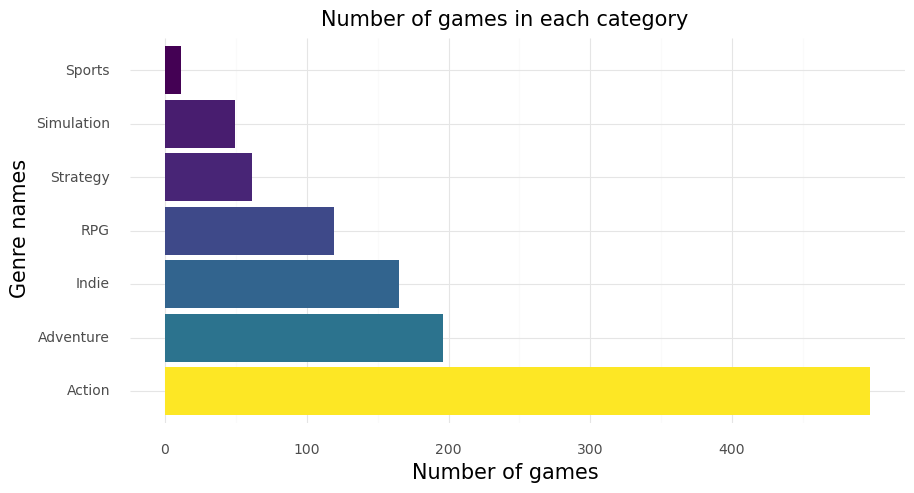

<ggplot: (8786732771365)>

In [12]:
order_categories = genre_df.sort_values("num_game", ascending=False)["genre"].unique()
genre_df["genre"] = pd.Categorical(genre_df["genre"], categories=order_categories, ordered=True)

g = (ggplot(genre_df, aes(x="genre", y="num_game", fill="num_game")) +
        geom_col() +    # Bar chart
        theme_minimal() +   # Minimal theme
        coord_flip() +
        scale_y_continuous(breaks=range(0, 500, 100)) +   # Set the x-axis ticks
        scale_x_discrete(limits=order_categories) +   # Set the x-axis limits
        guides(fill=False) +    # Remove the legend
        theme(figure_size=(10, 5),
              axis_text = element_text(size=10),
              text = element_text(size=10),
              title= element_text(size=15),
              plot_caption=element_text(margin={"t": 20})) +   # Rotate the x-axis labels
        labs(title="Number of games in each category",
             x="Genre names", y="Number of games")
    )

g

---

### number of genres column

In [16]:
df_pivotted

present                       \
genre                                     Action Adventure Indie  RPG   
name                              appid                                 
All                                          497       196   165  119   
7 Days to Die                     251570       1         1     1    1   
Mount & Blade II: Bannerlord      261550       1         0     1    1   
Warface                           291480       1         1     0    1   
Noita                             881100       1         1     1    1   
...                                          ...       ...   ...  ...   
Day of Defeat: Source             300          1         0     0    0   
Day of Defeat                     30           1         0     0    0   
Halo: The Master Chief Collection 976730       1         0     0    0   
Hitman: Absolution                203140       1         0     0    0   
Saints Row: The Third             55230        1         0     0    0   

                                                                           
genre                                    Simulation Sports Strategy   All  
name                              appid                                    
All                                              49     11       61  1098  
7 Days to Die                     251570          1      0        1     6  
Mount & Blade II: Bannerlord      261550          1      0        1     5  
Warface                           291480          1      0        1     5  
Noita                             881100          1      0        0     5  
...                                             ...    ...      ...   ...  
Day of Defeat: Source             300             0      0        0     1  
Day of Defeat                     30              0      0        0     1  
Halo: The Master Chief Collection 976730          0      0        0     1  
Hitman: Absolution                203140          0      0        0     1  
Saints Row: The Third             55230           0      0        0     1  

[498 rows x 8 columns]

In [27]:

num_genre_df = df_pivotted.reset_index() # change the pivot table to dataframe
num_genre_df.columns = num_genre_df.columns.droplevel(level=0) # drrop the firt level of column names

num_genre_df = num_genre_df.drop(columns=genres) # remove unnecessary columns
num_genre_df.columns = ['name', 'appid', 'num_genres'] # rename the remaining columns
num_genre_df


,name,appid,num_genres
0,All,,1098
1,7 Days to Die,251570,6
2,Mount & Blade II: Bannerlord,261550,5
3,Warface,291480,5
4,Noita,881100,5
...,...,...,...
493,Day of Defeat: Source,300,1
494,Day of Defeat,30,1
495,Halo: The Master Chief Collection,976730,1
496,Hitman: Absolution,203140,1


In [53]:
df_ranking = df.drop_duplicates(subset='appid')\
            .drop(columns=['genre', 'isin_genres'])\
            .reset_index().drop(columns='index')
df_ranking['ranking'] = df_ranking.reset_index().index + 1
df_ranking

,name,appid,ranking
0,Dota 2,570,1
1,Counter-Strike: Global Offensive,730,2
2,Apex Legends,1172470,3
3,PUBG: BATTLEGROUNDS,578080,4
4,New World,1063730,5
...,...,...,...
492,Just Cause,6880,493
493,BioShock 2 Remastered,409720,494
494,Skul: The Hero Slayer,1147560,495
495,Call of Duty: Ghosts,209170,496


In [59]:
df_genre_ranking = pd.merge(num_genre_df, df_ranking, on='appid', how='left')\
                    .drop(columns='name_y')\
                    .sort_values(by='ranking').reset_index().drop(columns='index')
df_genre_ranking

,name_x,appid,num_genres,ranking
0,Dota 2,570,2,1.0
1,Counter-Strike: Global Offensive,730,1,2.0
2,Apex Legends,1172470,2,3.0
3,PUBG: BATTLEGROUNDS,578080,2,4.0
4,New World,1063730,3,5.0
...,...,...,...,...
493,BioShock 2 Remastered,409720,2,494.0
494,Skul: The Hero Slayer,1147560,2,495.0
495,Call of Duty: Ghosts,209170,1,496.0
496,Lord of the Rings: War in the North,32800,2,497.0


#### Further analysis based on the ranking and num_genres

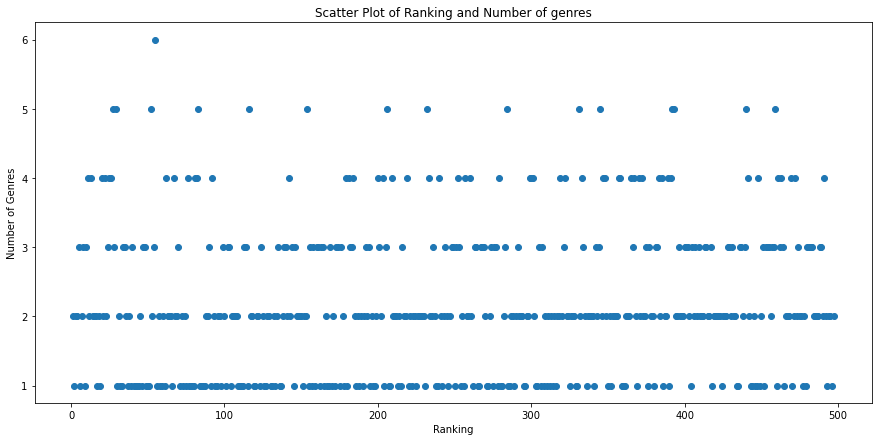

In [72]:
def plot_scatter(x, y, title='', xlabel='', ylabel='', figsize=(15,7)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y)
    plt.show()

plot_scatter(df_genre_ranking['ranking'], df_genre_ranking['num_genres'], 
             title='Scatter Plot of Ranking and Number of genres', 
             xlabel='Ranking', ylabel='Number of Genres')


#### Conclusion:

The number of geners a game has does NOT contribute to its ranking.